In [1]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

Generating a set of normal observation to be used as training data

In [2]:
X_train = 0.5 * random_seed.randn(500,2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x","y"])

In [4]:
X_test = 0.5 * random_seed.randn(500,2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x","y"])

Generate a set of outliers observation

In [5]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50,2))
X_outliers = pd.DataFrame(X_outliers, columns = ["x", "y"])

Lets take a look at what we have generated

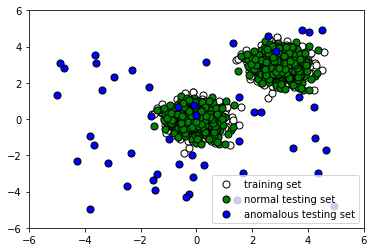

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")

plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend([p1,p2,p3], ["training set", "normal testing set", "anomalous testing set"], loc="lower right",)
plt.show()

training an isolation forest model

In [7]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [8]:
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.452368,-1.622080,-1
1,-0.173574,-1.976163,-1
2,-0.071178,0.790206,1
3,4.214452,0.644312,-1
4,3.783759,4.892080,-1


Lets plot the isolation forest prediction and overlay it on top of the graph

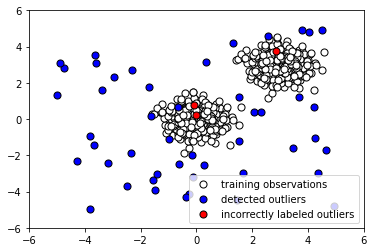

In [12]:
def printOutliers(X_train, X_outliers):
    p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
    p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ["x"]],
                     X_outliers.loc[X_outliers.pred == -1, ["y"]],
                     c = "blue",
                     s=50,
                     edgecolor="black")
    p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ["x"]],
                     X_outliers.loc[X_outliers.pred == 1, ["y"]],
                     c = "red",
                     s=50,
                     edgecolor="black")
    plt.xlim((-6,6))
    plt.ylim((-6,6))
    plt.legend(
        [p1,p2,p3],
        ["training observations","detected outliers", "incorrectly labeled outliers"],
        loc = "lower right"
    )

    plt.show()

printOutliers(X_train, X_outliers)

In [10]:
X_test = X_test.assign(pred=y_pred_test)
X_test.head()

,x,y,pred
0,3.086934,3.118704,1
1,2.079346,3.188134,-1
2,2.708133,2.778258,1
3,2.392190,2.906990,1
4,3.325868,3.438001,1


lets plot the testing data

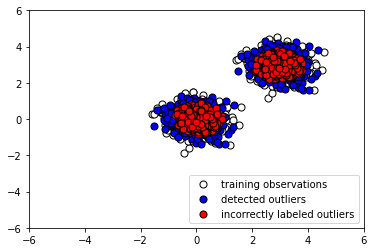

In [13]:
printOutliers(X_train, X_test)

The first step involves simply loading the necessary libraries that will allow us to
manipulate data quickly and easily. In steps 2 and 3, we generate a training and testing set
consisting of normal observations. These have the same distributions. In step 4, on the other
hand, we generate the remainder of our testing set by creating outliers. This anomalous
dataset has a different distribution from the training data and the rest of the testing data.
Plotting our data, we see that some outlier points look indistinguishable from normal
points (step 5). This guarantees that our classifier will have a significant percentage of
misclassifications, due to the nature of the data, and we must keep this in mind when
evaluating its performance. In step 6, we fit an instance of Isolation Forest with default
parameters to the training data.
Note that the algorithm is fed no information about the anomalous data. We use our
trained instance of Isolation Forest to predict whether the testing data is normal or
anomalous, and similarly to predict whether the anomalous data is normal or anomalous.
To examine how the algorithm performs, we append the predicted labels to X_outliers
(step 7) and then plot the predictions of the Isolation Forest instance on the outliers (step 8).
We see that it was able to capture most of the anomalies. Those that were incorrectly
labeled were indistinguishable from normal observations. Next, in step 9, we append the
predicted label to X_test in preparation for analysis and then plot the predictions of the
Isolation Forest instance on the normal testing data (step 10). We see that it correctly labeled
the majority of normal observations. At the same time, there was a significant number of
incorrectly classified normal observations (shown in red).
Depending on how many false alarms we are willing to tolerate, we may need to fine-tune
our classifier to reduce the number of false positives